In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

file_path = "./data/x_with_label.csv"  # 替換為你的檔案路徑
df = pd.read_csv(file_path)

feature = "Microsatellite instability Status (MSI)"

In [35]:
# Downsampling
# 分割兩個類別
df_majority = df[df[feature] == 1]
df_minority = df[df[feature] == 0]

# 對多數類別進行下採樣
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # 不重複取樣
                                   n_samples=len(df_minority),  # 與少數類別數量相同
                                   random_state=42)

# 合併少數類別和下採樣後的多數類別
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# 檢查新資料分布
print(df_balanced[feature].value_counts())


Microsatellite instability Status (MSI)
1    75505
0    75505
Name: count, dtype: int64


In [20]:
# Upsampling
# 分割兩個類別
df_majority = df[df[feature] == 1]
df_minority = df[df[feature] == 0]

# 對多數類別進行上採樣
df_minority_upsampled = resample(df_minority, 
                                   replace=True,    # 重複取樣
                                   n_samples=len(df_majority),  # 與少數類別數量相同
                                   random_state=42)

# 合併少數類別和上採樣後的多數類別
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# 檢查新資料分布
print(df_balanced[feature].value_counts())

CNA
1    1044951
0    1044951
Name: count, dtype: int64


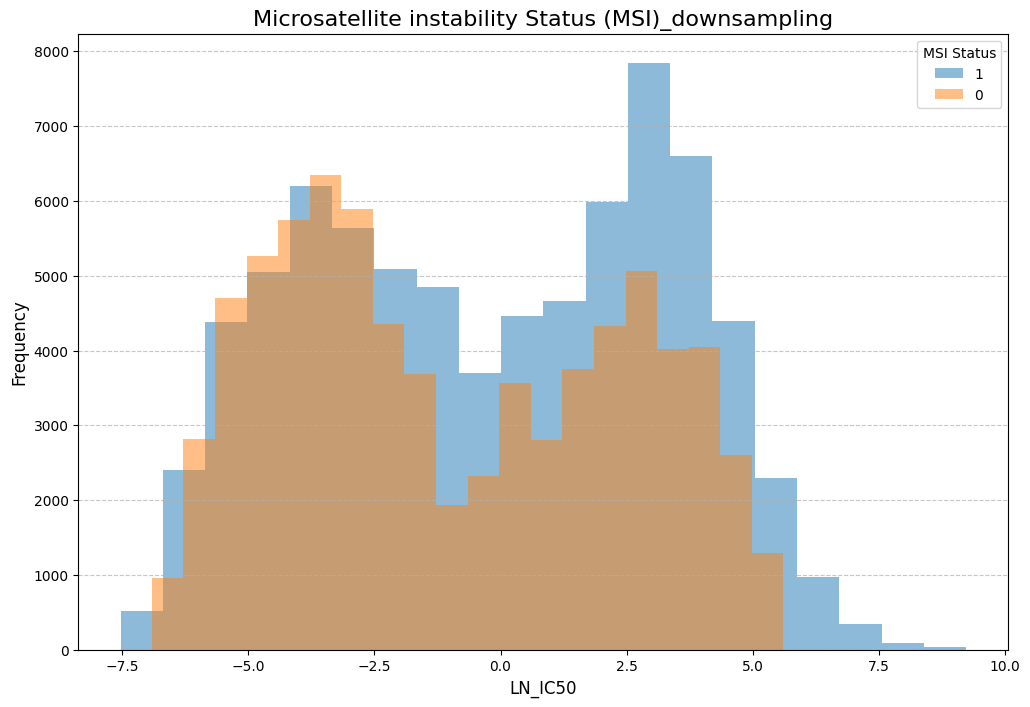

In [36]:
plt.figure(figsize=(12, 8))

df = df_balanced

# 針對每個 MSI 類別繪製直方圖
for category in df[feature].unique():
    subset = df[df[feature] == category]
    plt.hist(subset["LN_IC50"], bins=20, alpha=0.5, label=category)

# 添加圖例、標題和軸標籤
plt.title(f'{feature}_downsampling', fontsize=16)
plt.xlabel('LN_IC50', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='MSI Status', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 顯示圖表
plt.show()
